## MVP3 - Engenharia de Sistemas de Software Inteligentes
Prática de Machine Learning em Python

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pickle

## 1. Carga do Dataset

In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/ticomarques/MVP3_backend/main/dataset/bankloan_id.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,Age,Experience,Income,ZIP,Family,CCAvg,Education,Mortgage,pLoan,SecuritiesAccount,CdAccount,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## 2. Separação em conjunto de treino e conjunto de teste com holdout

In [3]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:12]
y = array[:,12]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

#X_train.head()
#y_train.head()

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## 3. Modelagem e Inferência

### 3.1 Criação e avaliação de modelos: linha base

KNN: 0.657000 (0.011169)
CART: 0.624000 (0.014457)
NB: 0.742000 (0.013775)
SVM: 0.706000 (0.001225)


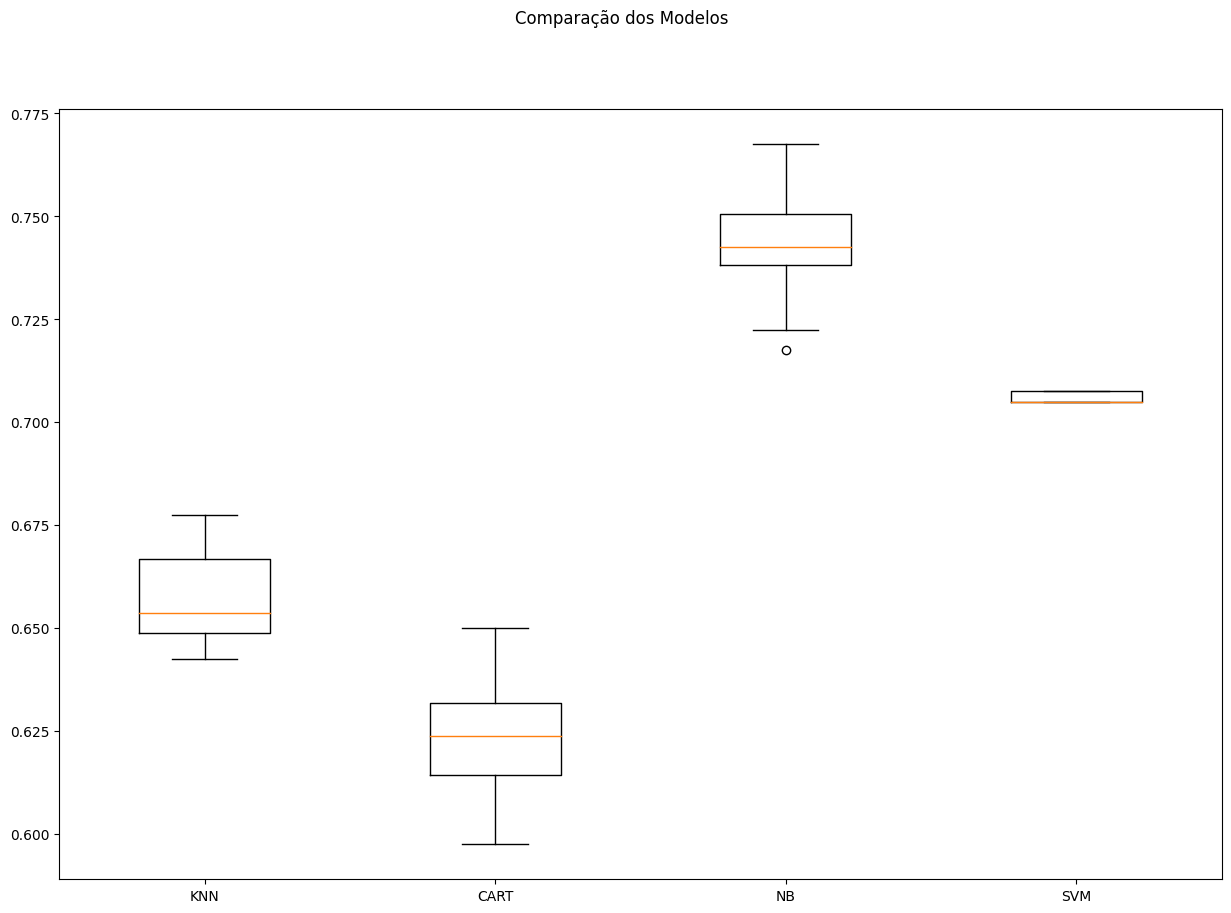

In [4]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 3.2 Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.657 (0.011)
CART-orig: 0.624 (0.014)
NB-orig: 0.742 (0.014)
SVM-orig: 0.706 (0.001)
KNN-padr: 0.690 (0.015)
CART-padr: 0.621 (0.015)
NB-padr: 0.742 (0.014)
SVM-padr: 0.745 (0.013)
KNN-norm: 0.684 (0.015)
CART-norm: 0.622 (0.023)
NB-norm: 0.742 (0.014)
SVM-norm: 0.746 (0.013)


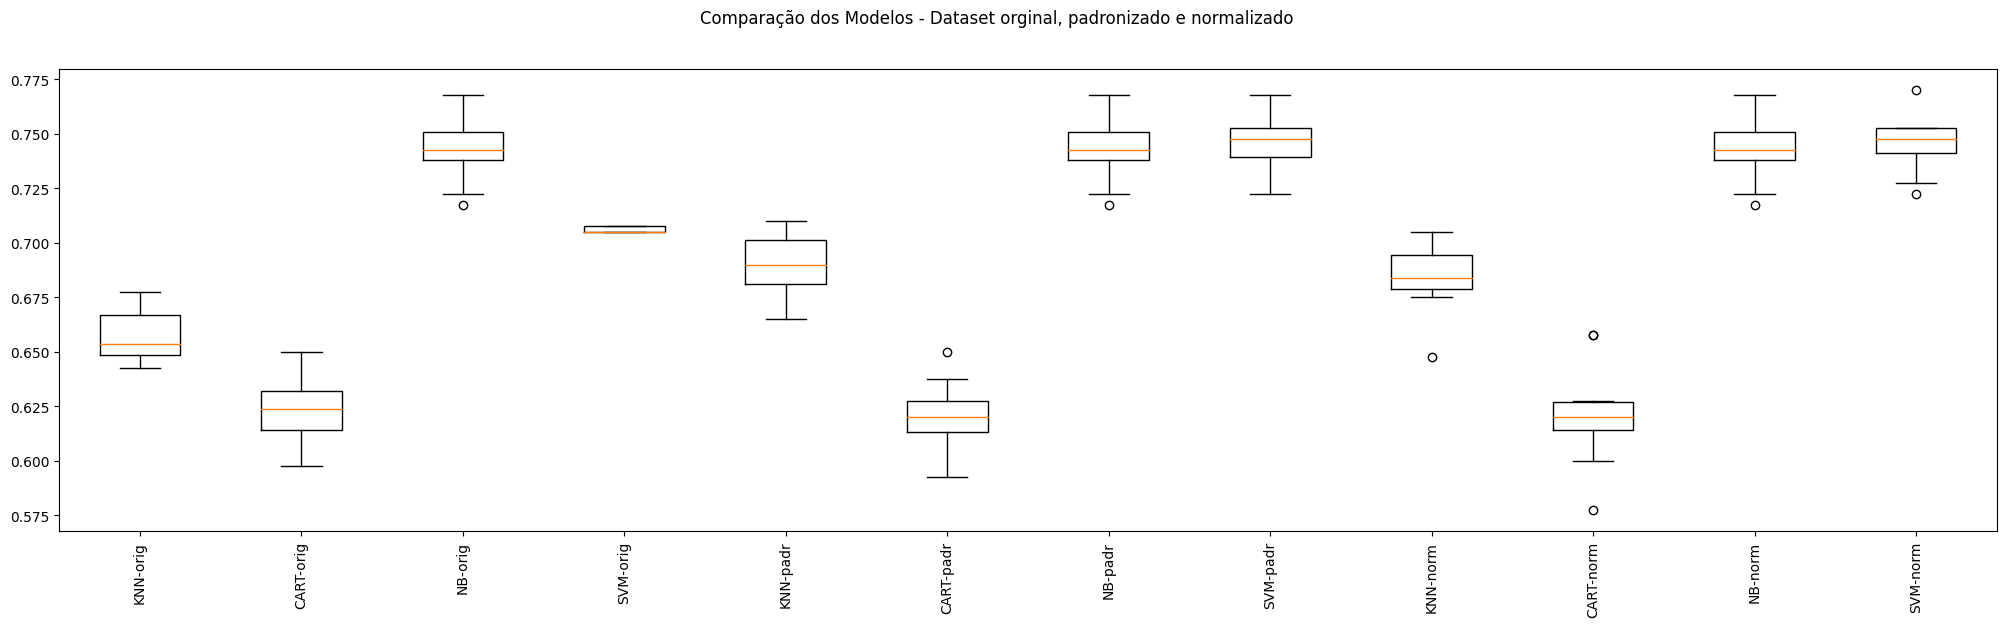

In [5]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### 3.3 Otimização dos hiperparâmetros

In [6]:
# Tuning do SVM

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
svm = ('SVM', SVC())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('svm-orig', Pipeline(steps=[svm])))
pipelines.append(('svm-padr', Pipeline(steps=[standard_scaler, svm])))
pipelines.append(('svm-norm', Pipeline(steps=[min_max_scaler, svm])))

param_grid = {
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: svm-orig - Melhor: 0.706000 usando {}
Sem tratamento de missings: svm-padr - Melhor: 0.745250 usando {}
Sem tratamento de missings: svm-norm - Melhor: 0.745750 usando {}


## 4. Finalização do Modelo

In [7]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = SVC(gamma='auto')
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.742


In [8]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

SVC(gamma='auto')

## 5. Simulando a aplicação do modelo em dados não vistos

In [9]:
# Novos dados - não sabemos a classe!
# Age	Experience	Income	ZIP.Code	Family	CCAvg	Education	Mortgage	Personal.Loan	Securities.Account	CD.Account	Online

# 65,39,105,94710,4,2.4,3,0,0,0,0,0,0 -- 0
# 36,11,152,95521,2,3.9,1,159,0,0,0,0 -- 1
# 46,20,158,90064,1,2.4,1,0,0,0,0,1 -- 1

data = {'Age':  [65, 36, 46],
        'Experience': [39, 11, 40],
        'Income': [105, 152, 198],
        'ZIP': [94710, 95521, 90064],
        'Family': [4, 2, 1],
        'CCAvg': [2.4, 3.9, 3.9],
        'Education': [3, 1, 1],
        'Mortgage': [0, 159, 180],
        'pLoan': [0, 0, 0],
        'SecuritiesAccount': [0, 0, 0],
        'CdAccount': [1, 0, 1],
        'Online': [1, 0, 0],
        }

atributos = ['Age', 'Experience', 'Income', 'ZIP', 'Family', 'CCAvg', 'Education', 'Mortgage','pLoan', 'SecuritiesAccount', 'CdAccount', 'Online']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:12].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 1.71536965  1.64783451  0.6783922   0.73410051  1.39741398  0.26441555
   1.33248376 -0.55552393 -0.32587527 -0.34142334  3.94414647  0.82195086]
 [-0.81472555 -0.79399611  1.69948481  1.11635197 -0.34543209  1.12279241
  -1.04907792  1.0078421  -0.32587527 -0.34142334 -0.25354028 -1.21661774]
 [ 0.05772107  1.73504275  2.69885204 -1.45571492 -1.21685513  1.12279241
  -1.04907792  1.2143244  -0.32587527 -0.34142334  3.94414647 -1.21661774]]


In [10]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 0. 1.]


In [15]:
#Salva o modelo treinado
pickle_out = open("bankloan.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

# Salvando o scaler
scaler_filename = 'minmax_scaler_loan.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)



# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("X_test_dataset_loan.csv", index=False)
y_test_df.to_csv("y_test_dataset_loan.csv", index=False)

In [16]:
pickle_in = open("bankloan.pkl","rb")
modelo2 = pickle.load(pickle_in)
pickle_in.close()

saida = modelo2.predict(rescaledEntradaX)
print(saida)

[1. 0. 1.]
